In [199]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

In [200]:
df = pd.read_csv("heart.csv")
data = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
            'exng', 'oldpeak', 'slp', 'caa', 'thall']]
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [201]:
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler().fit(data)
data = sclaer.transform(data)

In [202]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(data,df['output'])
X_train[:10]

array([[-0.92271345,  0.68100522,  0.03203122, -1.74901199, -0.95205107,
         2.394438  ,  0.89896224,  0.27782582, -0.69663055, -0.89686172,
         0.97635214, -0.71442887,  1.12302895],
       [ 0.5110413 ,  0.68100522, -0.93851463,  1.84910094, -1.3578862 ,
         2.394438  , -1.00583187, -2.60838751, -0.69663055, -0.03416616,
        -0.64911323,  1.24459328, -2.14887271],
       [ 0.73161895,  0.68100522,  1.97312292,  0.13571383, -0.23700823,
        -0.41763453,  0.89896224, -0.20320974, -0.69663055,  1.34614673,
        -0.64911323,  1.24459328, -0.51292188],
       [-2.13589054,  0.68100522, -0.93851463, -0.66386682, -0.93272559,
        -0.41763453,  0.89896224, -0.85916731,  1.43548113,  0.48345117,
        -0.64911323, -0.71442887,  1.12302895],
       [ 0.5110413 ,  0.68100522, -0.93851463,  0.47839125, -1.33856072,
        -0.41763453,  0.89896224,  0.54020884,  1.43548113, -0.89686172,
         0.97635214,  0.26508221,  1.12302895],
       [ 0.06988599,  0.681005

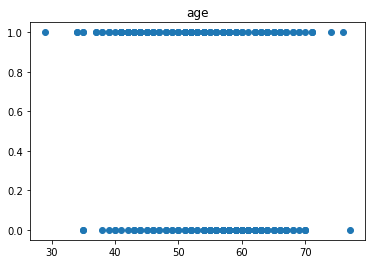

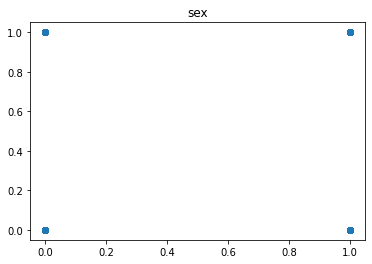

In [203]:
def draw(column):
    plt.scatter(df[column],df['output'])
    plt.title(column)
    plt.show()
###
draw("age")
draw("sex")
# ...

In [204]:
# loss func
def loss(y_pre,y_test):
    correct_pre  = 0
    for i in range(len(y_pre)):
        if y_pre[i] == y_test[i]:
            correct_pre += 1
    print(correct_pre/len(y_pre))

In [205]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20 , weights="distance" , algorithm="auto")
'''
n_neighbors: Number of neighbors to use
Weight function used in prediction. Possible values: uniform(all poins are same) , distance(weight points by the inverse of their distance)
algorithm: auto(automatic find best algorithm) , balltree , KDtree 
'''
model.fit(X_train , Y_train)

# find loss
Y_pre1 = model.predict(X_test)
loss(Y_pre1,Y_test.values)

0.8026315789473685


In [206]:
# Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)

# find loss
Y_pre2 = tree.predict(X_test)
loss(Y_pre2,Y_test.values)

0.8026315789473685


In [207]:
# SVM
from sklearn.svm import SVC
svc = SVC(C=1 , kernel='rbf' , gamma=0.01)
'''
C: Regularization parameter
kernel : Specifies the kernel type to be used in the algorithm
1^^^ linear : The most basic way to use a SVC is with a linear kernel. it is not very good
2^^^ sigmoid : 1/(1+e^x) --> 0,1
3^^^ poly : in the polynomial kernel, we simply calculate the dot product by increasing the power of the kernel
4^^^ rbf : the squared Euclidean distance between two data points 

gamma : the decision region (The higher it is, the smaller the radius of each point)
C : The higher it is, the higher the penalty for each error
'''
svc.fit(X_train,Y_train)

# find loss
Y_pre3 = svc.predict(X_test)
loss(Y_pre3,Y_test.values)

0.8289473684210527


In [208]:
# Logistic
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,Y_train)

# find loss
Y_pre4 = logistic.predict(X_test)
loss(Y_pre4,Y_test.values)


0.8421052631578947


In [209]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators =400,               # Number of trees
                                max_depth=5,                     # The maximum depth of the tree
                                min_weight_fraction_leaf=0.01,   # The minimum weighted fraction of the sum total of weights
                                max_features=5                   # The maximum of features that will be used in each tree
                        
)
forest.fit(X_train,Y_train)

# find loss
Y_pre5 = forest.predict(X_test)
loss(Y_pre5,Y_test.values)

0.881578947368421
